<h1>Fusion - Anomaly Detection</h1>



In [1]:
import wget
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import numpy as np

In [2]:
plt.rcParams["figure.figsize"] = (15,15)

In [3]:
print('downloading data')
#data_url = 'https://api.thingspeak.com/channels/35939/feeds.csv?results=8000'
data_file = 'feeds.csv' #data_file = wget.download(data_url)
df = pd.read_csv(data_file)

def to_date(string):
    return datetime.datetime.strptime(string, '%Y-%m-%d %H:%M:%S UTC')

df.created_at = df.created_at.apply(to_date)
df.set_index('created_at', inplace=True)
print(df.shape)
df.head()

downloading data
(299412, 5)


entry_id  field1  field2  field3  field4
created_at                                                   
2018-07-19 17:59:04         1   212.2    44.0  22.000  23.375
2018-07-19 17:59:33         2   211.9    44.0  22.062  23.375
2018-07-19 17:59:48         3   202.6    44.5  22.062  23.437
2018-07-19 18:00:03         4   210.2    44.5  22.000  23.437
2018-07-19 18:00:21         5   210.9    44.5  22.000  23.437

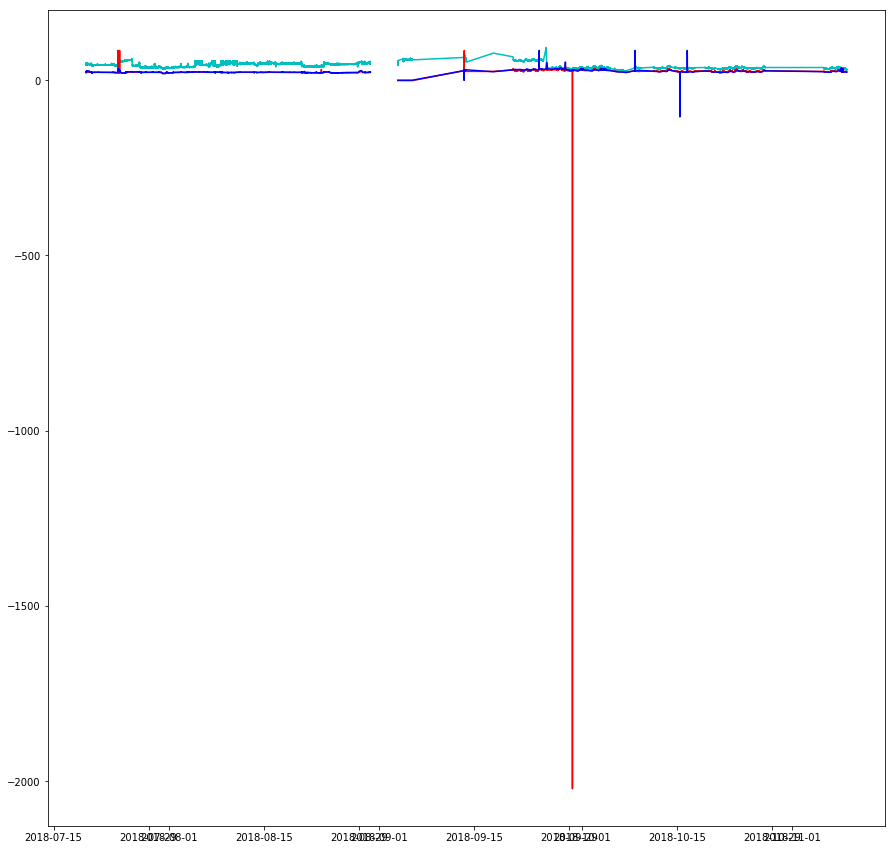

In [4]:
plt.plot(df.field2,"c",df.field3,"r",df.field4,"b")
plt.show()

In [5]:
df3 = pd.DataFrame([])
df3['field2'] = df['field2'].resample('1T').mean()
df3['field3'] = df['field3'].resample('1T').mean()
df3['field4'] = df['field4'].resample('1T').mean()
df3.head()

field2     field3     field4
created_at                                          
2018-07-19 17:59:00  44.166667  22.041333  23.395667
2018-07-19 18:00:00  44.700000  21.979000  23.458000
2018-07-19 18:01:00  45.100000  21.937000  23.562000
2018-07-19 18:02:00  45.100000  21.979000  23.562000
2018-07-19 18:03:00  45.100000  21.968500  23.531000

In [6]:
df3['id'] = range(1,df3.shape[0]+1)
df3

field2     field3     field4      id
created_at                                                  
2018-07-19 17:59:00  44.166667  22.041333  23.395667       1
2018-07-19 18:00:00  44.700000  21.979000  23.458000       2
2018-07-19 18:01:00  45.100000  21.937000  23.562000       3
2018-07-19 18:02:00  45.100000  21.979000  23.562000       4
2018-07-19 18:03:00  45.100000  21.968500  23.531000       5
2018-07-19 18:04:00  45.100000  21.937000  23.500000       6
2018-07-19 18:05:00  44.650000  21.937000  23.515500       7
2018-07-19 18:06:00  45.100000  21.937000  23.520667       8
2018-07-19 18:07:00  44.700000  21.937000  23.562000       9
2018-07-19 18:08:00  44.900000  21.937000  23.520667      10
2018-07-19 18:09:00  44.900000  21.958000  23.500000      11
2018-07-19 18:10:00  44.500000  21.958000  23.583000      12
2018-07-19 18:11:00  45.100000  21.937000  23.625000      13
2018-07-19 18:12:00  44.800000  22.000000  23.625000      14
2018-07-19 18:13:00  45.100000  21.937000  23.687333      15
2018-07-19 18:14:00  45.100000  21.937000  23.729000      16
2018-07-19 18:15:00  44.700000  21.937000  23.687333      17
2018-07-19 18:16:00  44.375000  21.937000  23.687000      18
2018-07-19 18:17:00  44.500000  21.937000  23.593500      19
2018-07-19 18:18:00  44.166667  21.937000  23.562000      20
2018-07-19 18:19:00  44.166667  21.937000  23.562000      21
2018-07-19 18:20:00  44.533333  21.937000  23.583000      22
2018-07-19 18:21:00  45.100000  21.937000  23.625000      23
2018-07-19 18:22:00  44.900000  21.937000  23.625000      24
2018-07-19 18:23:00  45.100000  21.937000  23.687500      25
2018-07-19 18:24:00  44.700000  21.937000  23.666333      26
2018-07-19 18:25:00  44.700000  21.937000  23.604000      27
2018-07-19 18:26:00  44.900000  21.937000  23.583000      28
2018-07-19 18:27:00  45.100000  21.937000  23.666333      29
2018-07-19 18:28:00  45.100000  21.937000  23.687000      30
...                        ...        ...        ...     ...
2018-11-08 23:46:00  30.400000  23.406000  23.437000  161628
2018-11-08 23:47:00  30.150000  23.375000  23.437000  161629
2018-11-08 23:48:00  29.900000  23.343500  23.437000  161630
2018-11-08 23:49:00  30.066667  23.270667  23.437000  161631
2018-11-08 23:50:00  30.233333  23.250000  23.416333  161632
2018-11-08 23:51:00  30.233333  23.208000  23.437000  161633
2018-11-08 23:52:00  30.233333  23.187000  23.437000  161634
2018-11-08 23:53:00  30.233333  23.187000  23.437000  161635
2018-11-08 23:54:00  30.150000  23.187000  23.437000  161636
2018-11-08 23:55:00  30.233333  23.187000  23.437000  161637
2018-11-08 23:56:00  30.233333  23.145667  23.437000  161638
2018-11-08 23:57:00  30.400000  23.156000  23.437000  161639
2018-11-08 23:58:00  30.400000  23.125000  23.406000  161640
2018-11-08 23:59:00  30.033333  23.125000  23.395667  161641
2018-11-09 00:00:00  30.150000  23.125000  23.375000  161642
2018-11-09 00:01:00  30.400000  23.156000  23.406000  161643
2018-11-09 00:02:00  30.400000  23.187000  23.395667  161644
2018-11-09 00:03:00  30.566667  23.187000  23.375000  161645
2018-11-09 00:04:00  30.400000  23.218500  23.375000  161646
2018-11-09 00:05:00  30.566667  23.250000  23.375000  161647
2018-11-09 00:06:00  30.400000  23.312000  23.375000  161648
2018-11-09 00:07:00  30.150000  23.312000  23.375000  161649
2018-11-09 00:08:00  30.400000  23.312000  23.375000  161650
2018-11-09 00:09:00  30.400000  23.291333  23.375000  161651
2018-11-09 00:10:00  29.900000  23.250000  23.375000  161652
2018-11-09 00:11:00  30.400000  23.208000  23.375000  161653
2018-11-09 00:12:00  30.150000  23.187000  23.375000  161654
2018-11-09 00:13:00  30.233333  23.166333  23.375000  161655
2018-11-09 00:14:00  30.400000  23.156000  23.375000  161656
2018-11-09 00:15:00  29.300000  23.125000  23.375000  161657

[161657 rows x 4 columns]

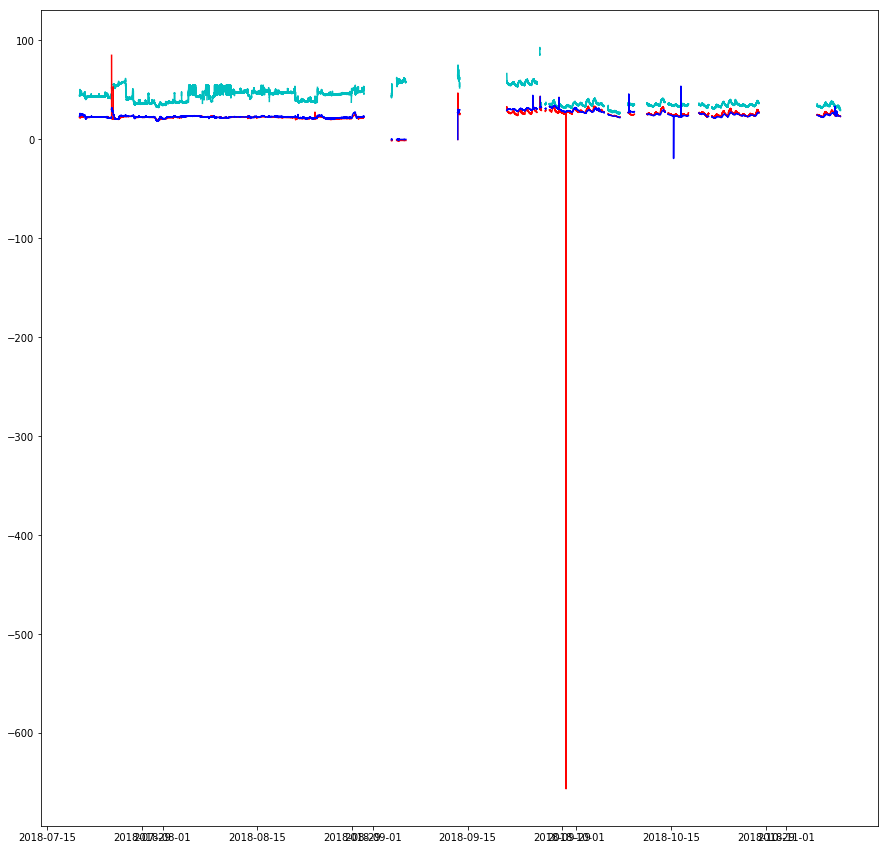

In [7]:
plt.plot(df3.field2,"c",df3.field3,"r",df3.field4,"b")
plt.show()

In [8]:
df3.to_pickle('feeds.pickle')

len_df = int(df3.shape[0]/3)
df_train = df3[:len_df]
df_test = df3[len_df:]

print(df_train.shape, df_test.shape)

In [10]:
def rmse(df1,df2):
    diff = (df1-df2) * (df1-df2)
    return diff.mean()**0.5
print("23",rmse(df['field2'],df['field3']))
print("24",rmse(df['field2'],df['field4']))
print("34",rmse(df['field3'],df['field4']))
print("43",rmse(df['field4'],df['field3']))

23 21.655618203304638
24 20.839125296138178
34 4.032742708844228
43 4.032742708844228


num_layer = 5
num_val = 3

vec = []
xvec = []

for x in range(num_layer):
    vec.append([np.random.normal(0,.1) for _ in range(num_val)])
        
for x in range(num_val):
    xvec.append([np.random.normal(0,.1) for _ in range(num_layer)])
for x in vec:
    print("vec ",x)
for x in xvec:
    print("xvec ",x)   

for line in df_train.iterrows():
    layer = list(line[1])
    print("layer",layer)
    values=[0 for _ in range(num_layer)]
    print(values)
    for n in range(num_layer):
        print("n ",n)
        values[n] = 0
        for v in range(num_val):
            print("v ",v)
            values[n] += layer[v]*vec[v][n] 
    print("values",values)


    for i in xvec:
        print(i)
    
    break

In [11]:
df3.head()

field2     field3     field4  id
created_at                                              
2018-07-19 17:59:00  44.166667  22.041333  23.395667   1
2018-07-19 18:00:00  44.700000  21.979000  23.458000   2
2018-07-19 18:01:00  45.100000  21.937000  23.562000   3
2018-07-19 18:02:00  45.100000  21.979000  23.562000   4
2018-07-19 18:03:00  45.100000  21.968500  23.531000   5

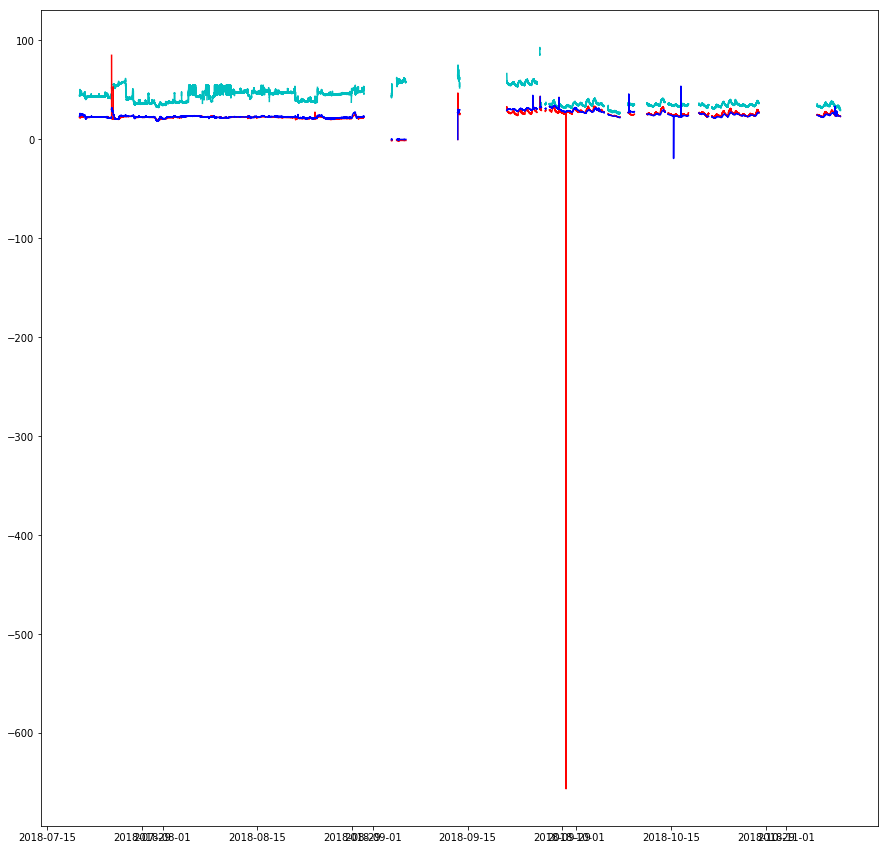

In [12]:
plt.plot(df3.field2,"c",df3.field3,"r",df3.field4,"b")
plt.show()

In [13]:
df3['field4_mean'] = df3.field4.rolling(30, min_periods=1).mean()

In [14]:
df3['field4_mean_cont'] = 0
vec=[]
m = ''
for line in df3.iterrows():
    if m == '':
        m = float(line[1][2])
    else:
        if not np.isnan(line[1][2]):
            m = (m * 29 + line[1][2])/30
        #print( line[1][0],m)
    vec.append(m)
df3['field4_mean_cont'] = vec
df3.head()

field2     field3     field4  id  field4_mean  \
created_at                                                              
2018-07-19 17:59:00  44.166667  22.041333  23.395667   1    23.395667   
2018-07-19 18:00:00  44.700000  21.979000  23.458000   2    23.426833   
2018-07-19 18:01:00  45.100000  21.937000  23.562000   3    23.471889   
2018-07-19 18:02:00  45.100000  21.979000  23.562000   4    23.494417   
2018-07-19 18:03:00  45.100000  21.968500  23.531000   5    23.501733   

                     field4_mean_cont  
created_at                             
2018-07-19 17:59:00         23.395667  
2018-07-19 18:00:00         23.397744  
2018-07-19 18:01:00         23.403220  
2018-07-19 18:02:00         23.408512  
2018-07-19 18:03:00         23.412595

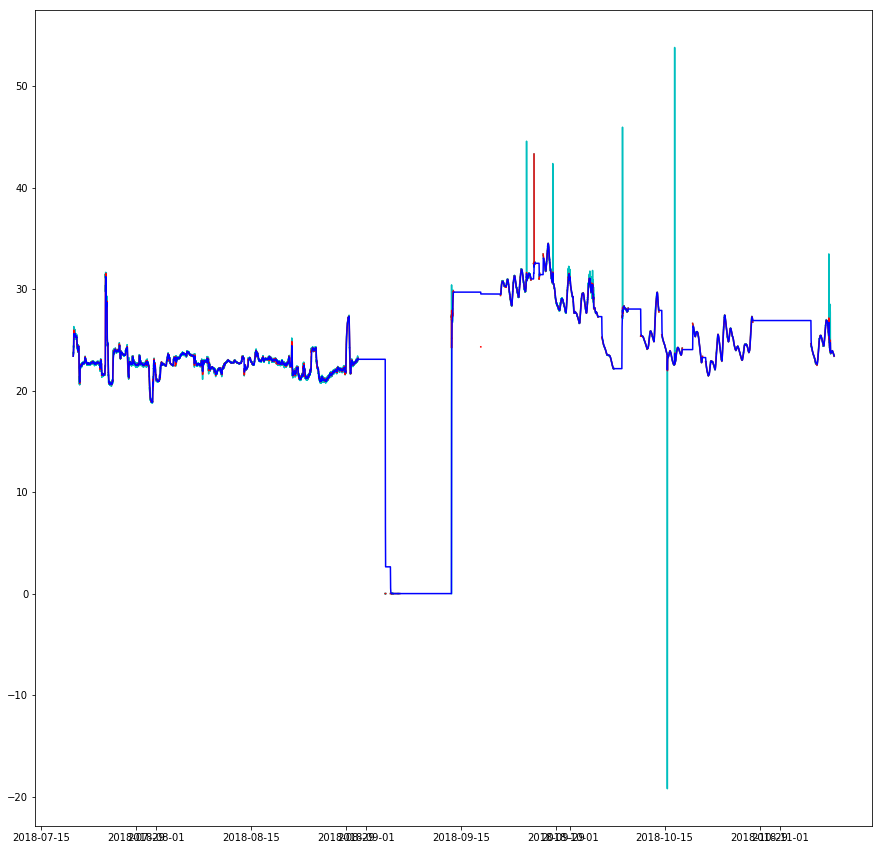

In [15]:
plt.plot(df3.field4,"c",df3.field4_mean,"r",df3.field4_mean_cont,"b")
plt.show()

In [16]:
df3['field4_sd'] = df3.field4.rolling(30, min_periods=1).std()
df3['field4_sd_cont'] = 0
vec=[]
m = ''
for line in df3.iterrows():
    if m == '':
        m = float(line[1][2])
        sd = 0
    else:
        if not np.isnan(line[1][2]):
            m = (m * 29 + line[1][2])/30
            diff = abs(m - line[1][2])
            sd = (((29*(sd) + diff)))/(30)
        #print( line[1][0],m)
    vec.append(sd)
df3['field4_sd_cont'] = vec

df3['field4_sd_run'] = 0
vec=[]
m = ''
sm = 0
for line in df3.iterrows():
    if m == '':
        n = 1
        r = float(line[1][2])
        m = float(line[1][2])
        sm += (r-m)**2/n
        variance = 0
    else:
        if not np.isnan(line[1][2]):
            n = min(30, n+1)
            r = float(line[1][2])
            m = (m*(n-1)+r)/n
            d = (r-m)**2
            variance = ((n-1)*(variance) + d)/(n+1)
    vec.append(variance**0.5)
df3['field4_sd_run'] = vec


0.34870005060921716
0.3056039631824028


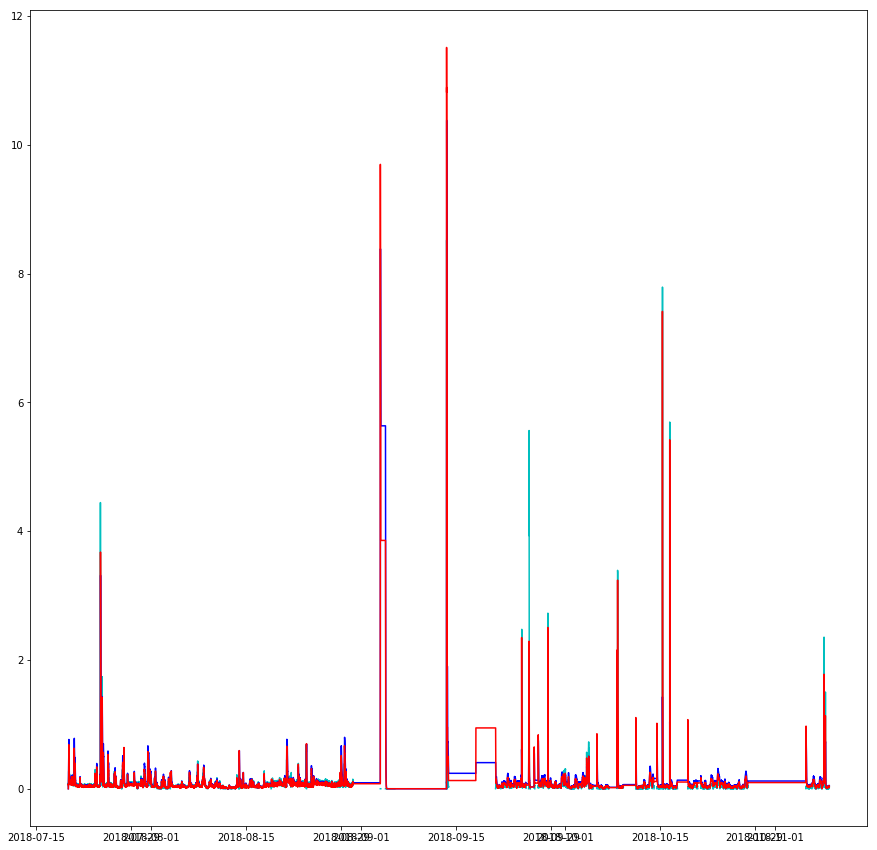

In [17]:
print(rmse(df3.field4_sd,df3.field4_sd_cont))
print(rmse(df3.field4_sd,df3.field4_sd_run))
plt.plot(df3.field4_sd,"c",df3.field4_sd_cont,"b",df3.field4_sd_run,"r")
plt.show()

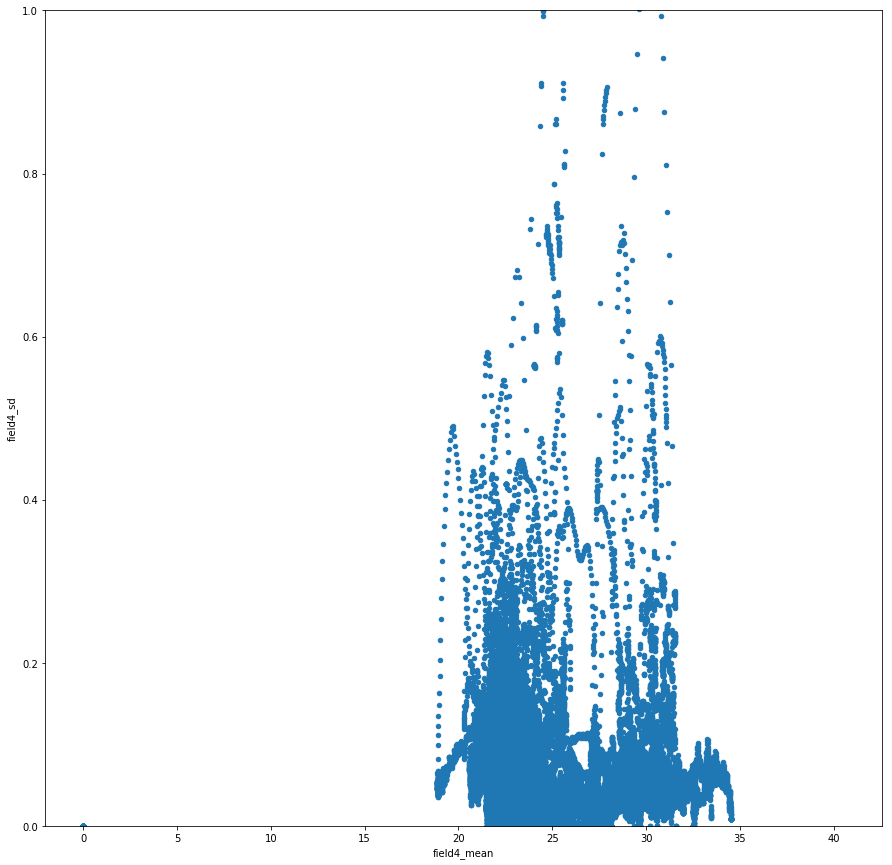

In [18]:
df3.plot(kind='scatter', x='field4_mean',y='field4_sd', ylim=(0,1))

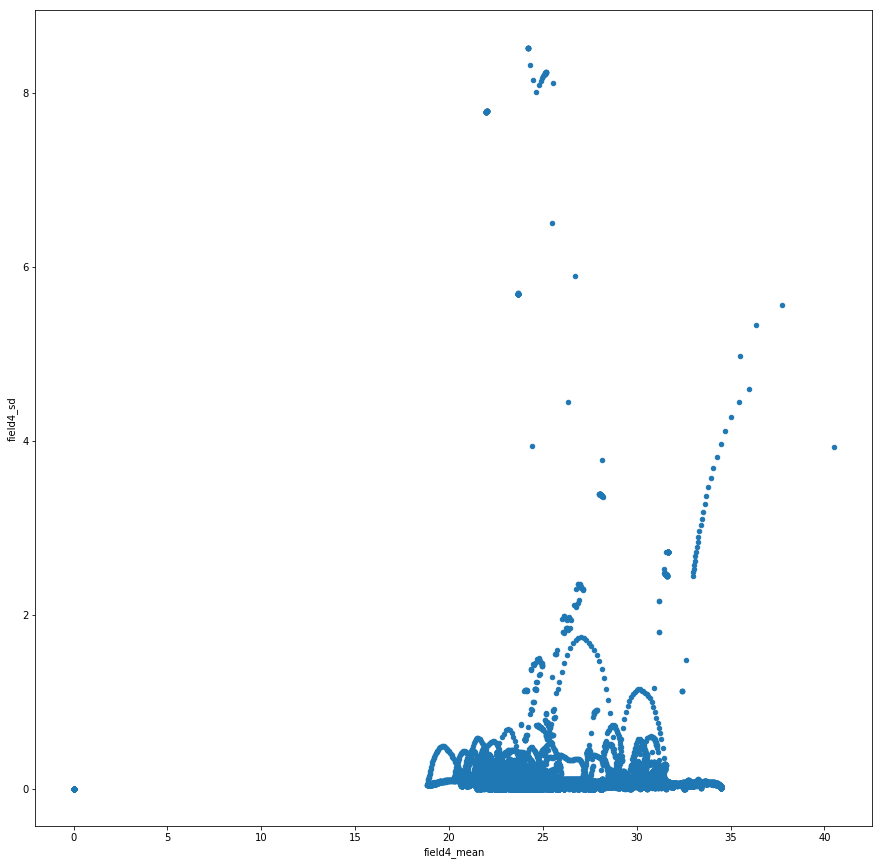

In [19]:
df3.plot(kind='scatter', x='field4_mean',y='field4_sd')

In [20]:
df4 = df3.reset_index()
df4['day'] = df4['created_at'].apply(datetime.datetime.toordinal)
df4.head()

created_at     field2     field3     field4  id  field4_mean  \
0 2018-07-19 17:59:00  44.166667  22.041333  23.395667   1    23.395667   
1 2018-07-19 18:00:00  44.700000  21.979000  23.458000   2    23.426833   
2 2018-07-19 18:01:00  45.100000  21.937000  23.562000   3    23.471889   
3 2018-07-19 18:02:00  45.100000  21.979000  23.562000   4    23.494417   
4 2018-07-19 18:03:00  45.100000  21.968500  23.531000   5    23.501733   

   field4_mean_cont  field4_sd  field4_sd_cont  field4_sd_run     day  
0         23.395667        NaN        0.000000       0.000000  736894  
1         23.397744   0.044076        0.002009       0.017994  736894  
2         23.403220   0.084032        0.007234       0.046818  736894  
3         23.408512   0.082083        0.012109       0.047208  736894  
4         23.412595   0.072944        0.015653       0.040355  736894

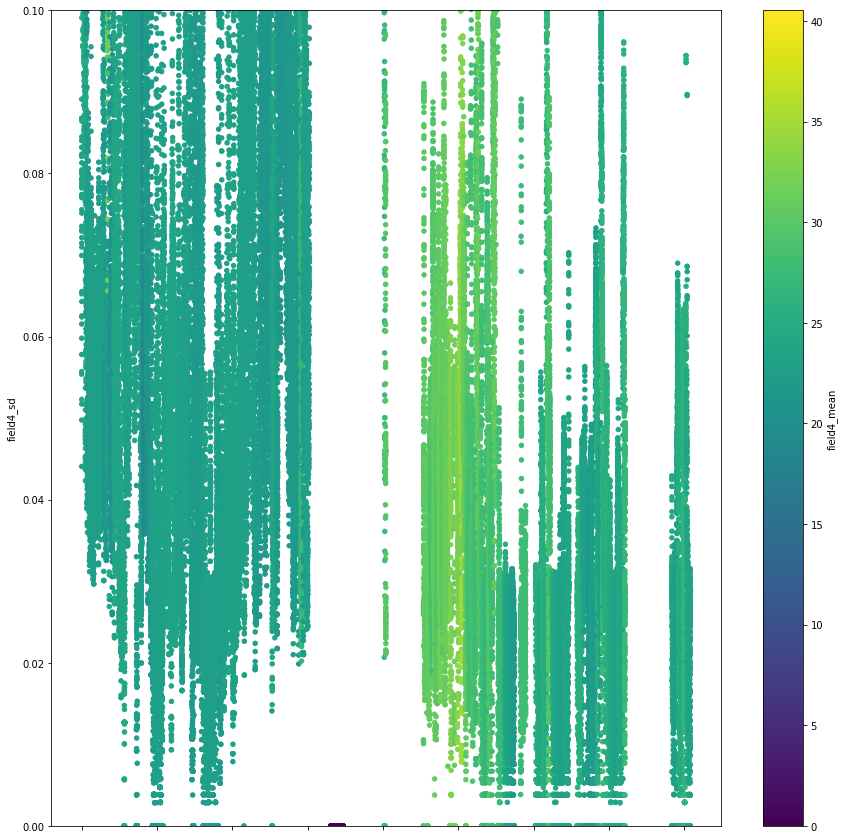

In [21]:
df4.plot(kind='scatter', x='id',y='field4_sd', c='field4_mean',  colormap='viridis', ylim=(0,.1))

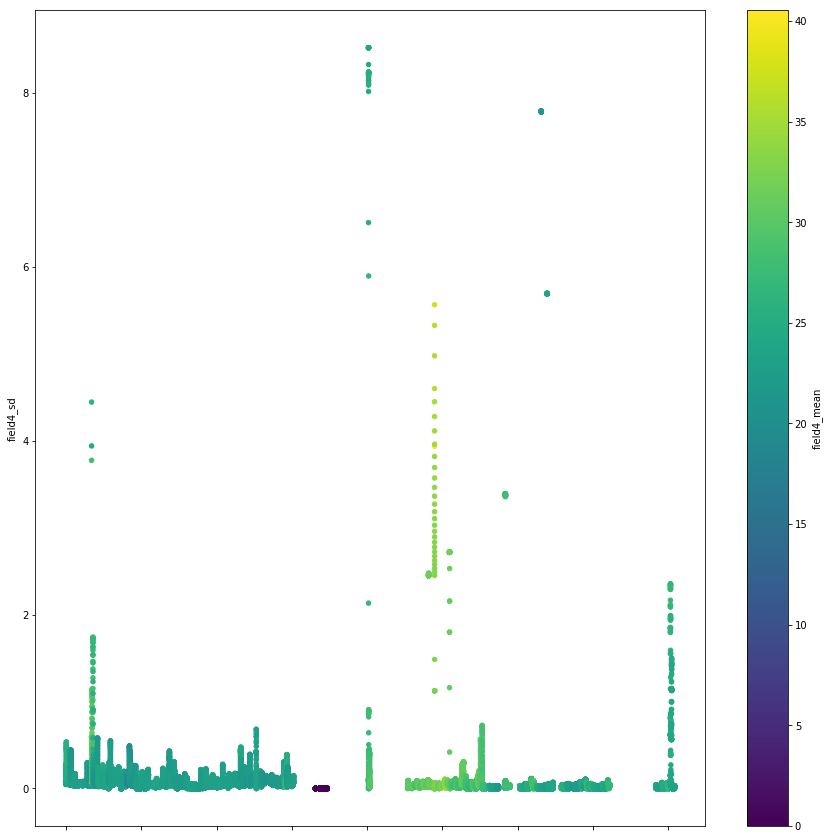

In [22]:
df4.plot(kind='scatter', x = 'id', y='field4_sd', c='field4_mean',  colormap='viridis')

In [23]:
df4['field2_sd'] = df4.field2.rolling(30, min_periods=1).std()
df4['field3_sd'] = df4.field3.rolling(30, min_periods=1).std()
df4['field4_sd'] = df4.field4.rolling(30, min_periods=1).std()
df4['field2_mean'] = df4.field2.rolling(30, min_periods=1).mean()
df4['field3_mean'] = df4.field3.rolling(30, min_periods=1).mean()
df4['field4_mean'] = df4.field4.rolling(30, min_periods=1).mean()

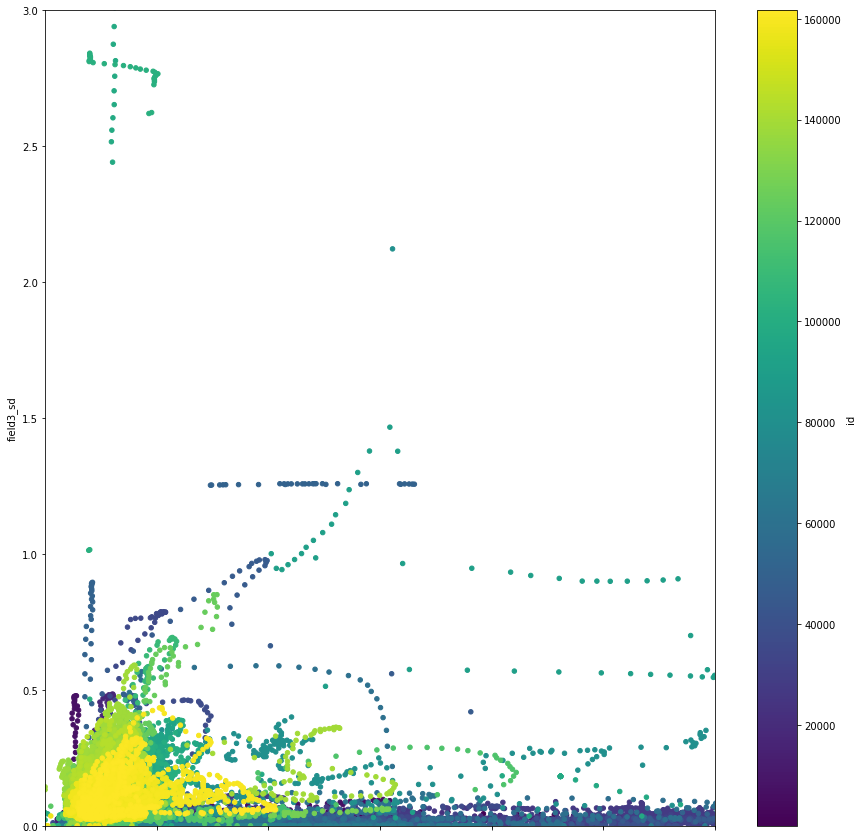

In [24]:
df4.plot(kind='scatter', x = 'field2_sd', y='field3_sd', c='id',  colormap='viridis', ylim=(0,3), xlim=(0,3))

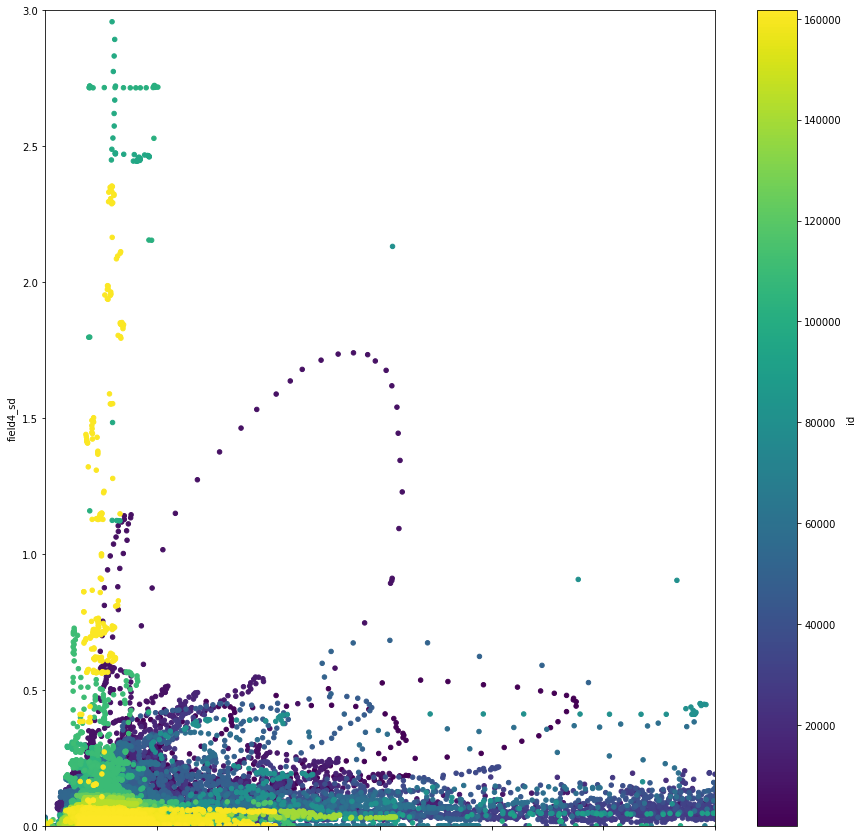

In [25]:
df4.plot(kind='scatter', x = 'field2_sd', y='field4_sd', c='id',  colormap='viridis', ylim=(0,3), xlim=(0,3))

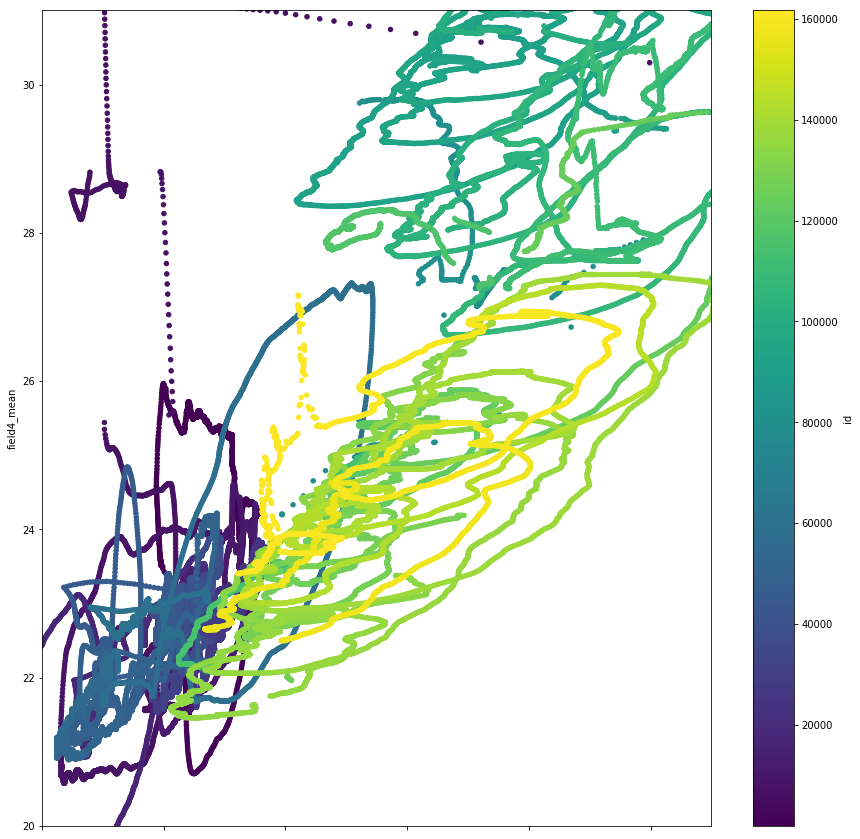

In [26]:
df4.plot(kind='scatter', x = 'field3_mean', y='field4_mean', c='id',  colormap='viridis', ylim=(20,31), xlim=(20,31))

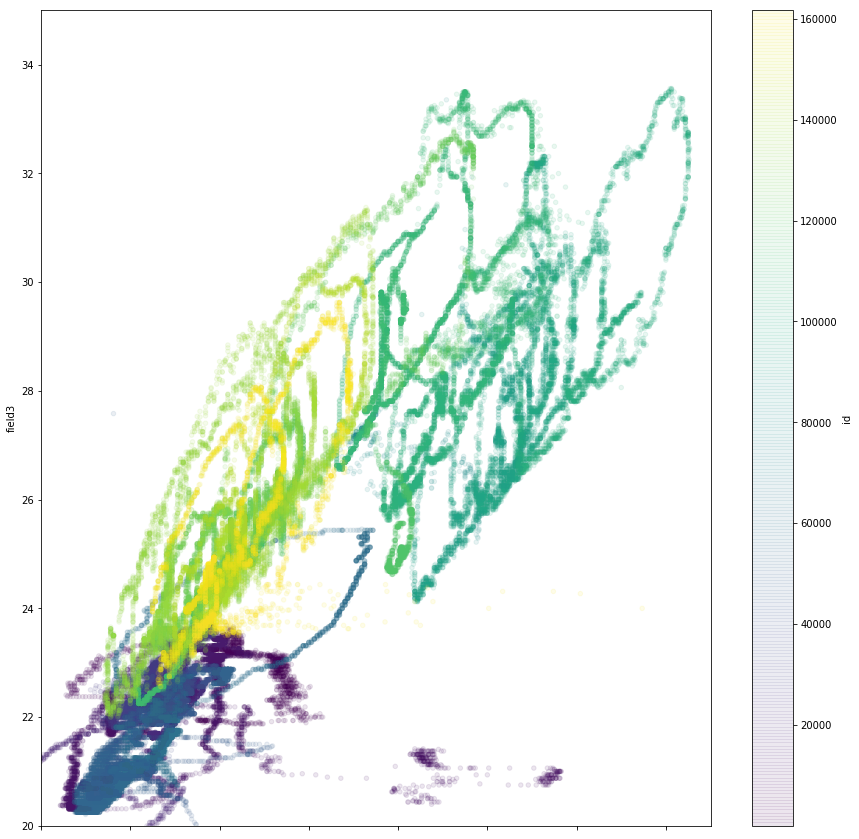

In [27]:
df4.plot(kind='scatter', x = 'field4', y='field3', c='id',  colormap='viridis', ylim=(20,35), xlim=(20,35), alpha=.1)

In [28]:
df4['hora'] = df4['created_at'].dt.hour + df4['created_at'].dt.hour/60
df4.head()

created_at     field2     field3     field4  id  field4_mean  \
0 2018-07-19 17:59:00  44.166667  22.041333  23.395667   1    23.395667   
1 2018-07-19 18:00:00  44.700000  21.979000  23.458000   2    23.426833   
2 2018-07-19 18:01:00  45.100000  21.937000  23.562000   3    23.471889   
3 2018-07-19 18:02:00  45.100000  21.979000  23.562000   4    23.494417   
4 2018-07-19 18:03:00  45.100000  21.968500  23.531000   5    23.501733   

   field4_mean_cont  field4_sd  field4_sd_cont  field4_sd_run     day  \
0         23.395667        NaN        0.000000       0.000000  736894   
1         23.397744   0.044076        0.002009       0.017994  736894   
2         23.403220   0.084032        0.007234       0.046818  736894   
3         23.408512   0.082083        0.012109       0.047208  736894   
4         23.412595   0.072944        0.015653       0.040355  736894   

   field2_sd  field3_sd  field2_mean  field3_mean       hora  
0        NaN        NaN    44.166667    22.041333  17.283333  
1   0.377124   0.044076    44.433333    22.010167  18.300000  
2   0.468251   0.052496    44.655556    21.985778  18.300000  
3   0.442217   0.042996    44.766667    21.984083  18.300000  
4   0.410961   0.037883    44.833333    21.980967  18.300000

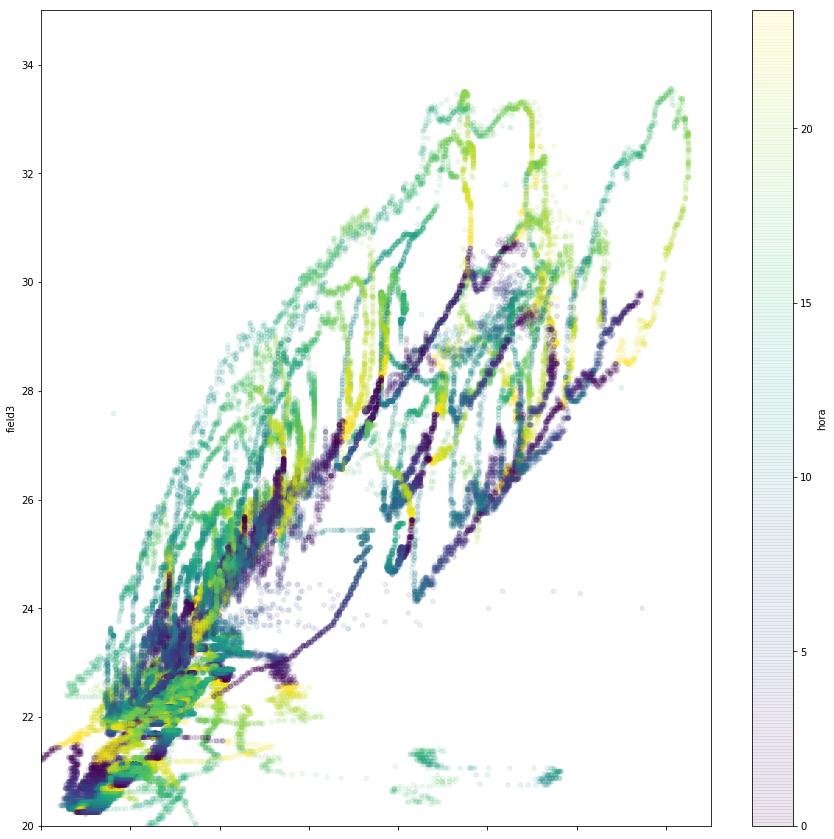

In [29]:
df4.plot(kind='scatter', x = 'field4', y='field3', c='hora',  colormap='viridis', ylim=(20,35), xlim=(20,35), alpha=.1)

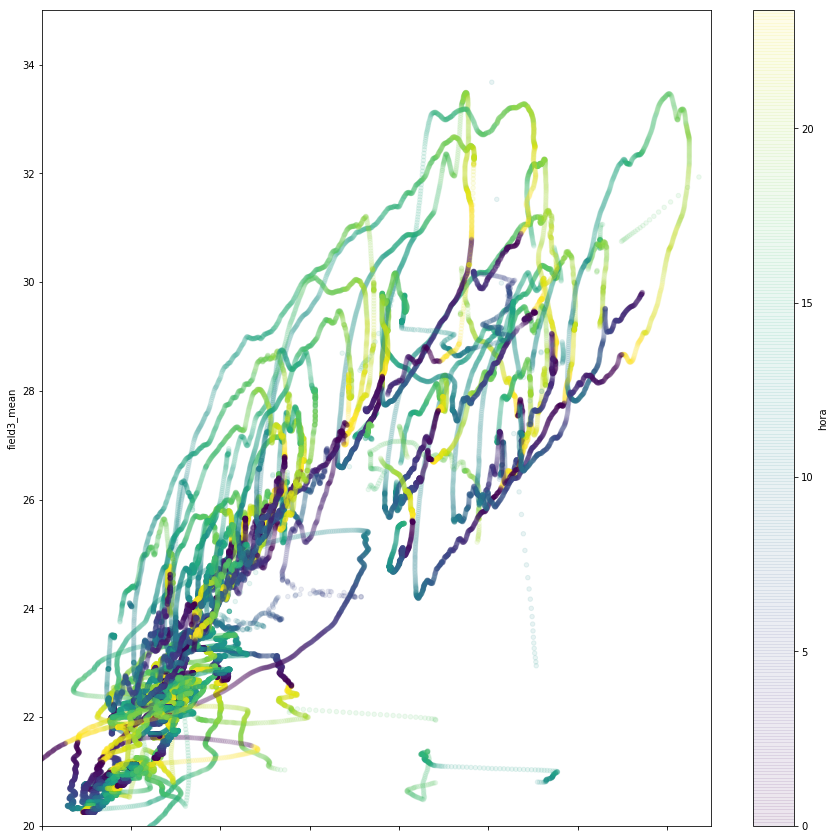

In [30]:
df4.plot(kind='scatter', x = 'field4_mean', y='field3_mean', c='hora',  
         colormap='viridis', ylim=(20,35), xlim=(20,35), alpha=.1)

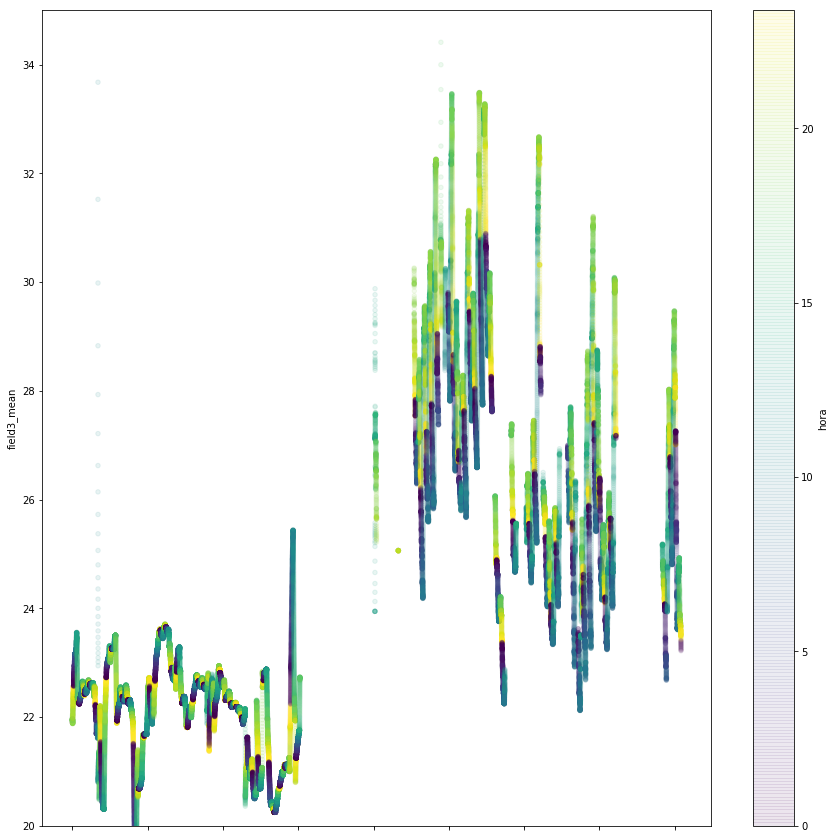

In [31]:
df4.plot(kind='scatter', x = 'id', y='field3_mean',c='hora',  
         colormap='viridis', ylim=(20,35),  alpha=.1)

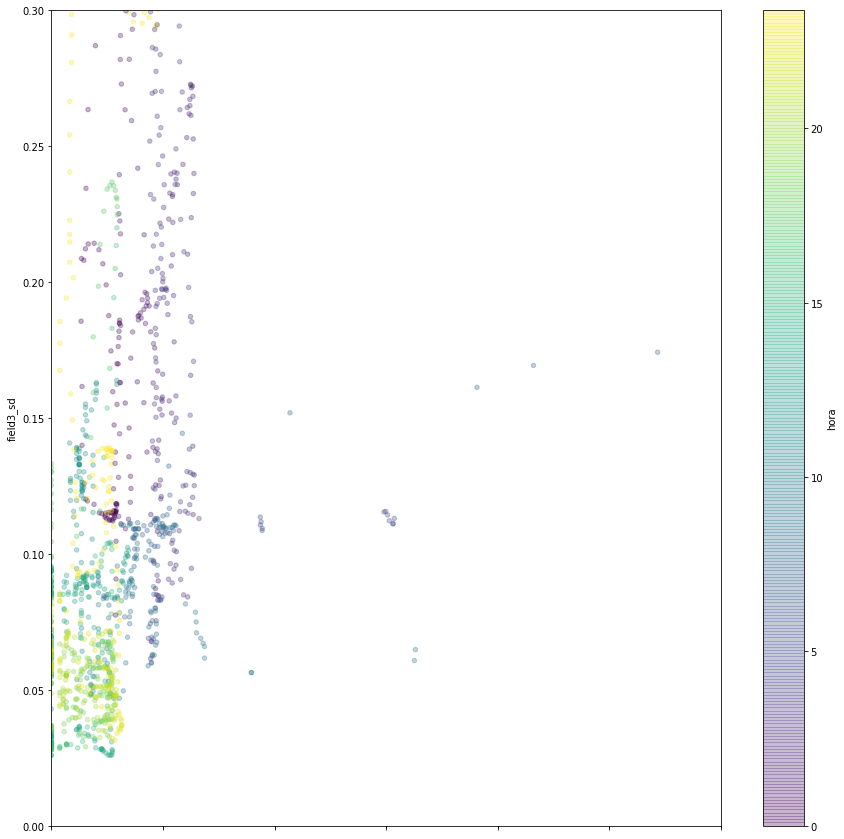

In [32]:
df4[-1500:].plot(kind='scatter', x = 'field4_sd', y='field3_sd', c='hora',  colormap='viridis', ylim=(0,.3), xlim=(0,.3), alpha=.3)

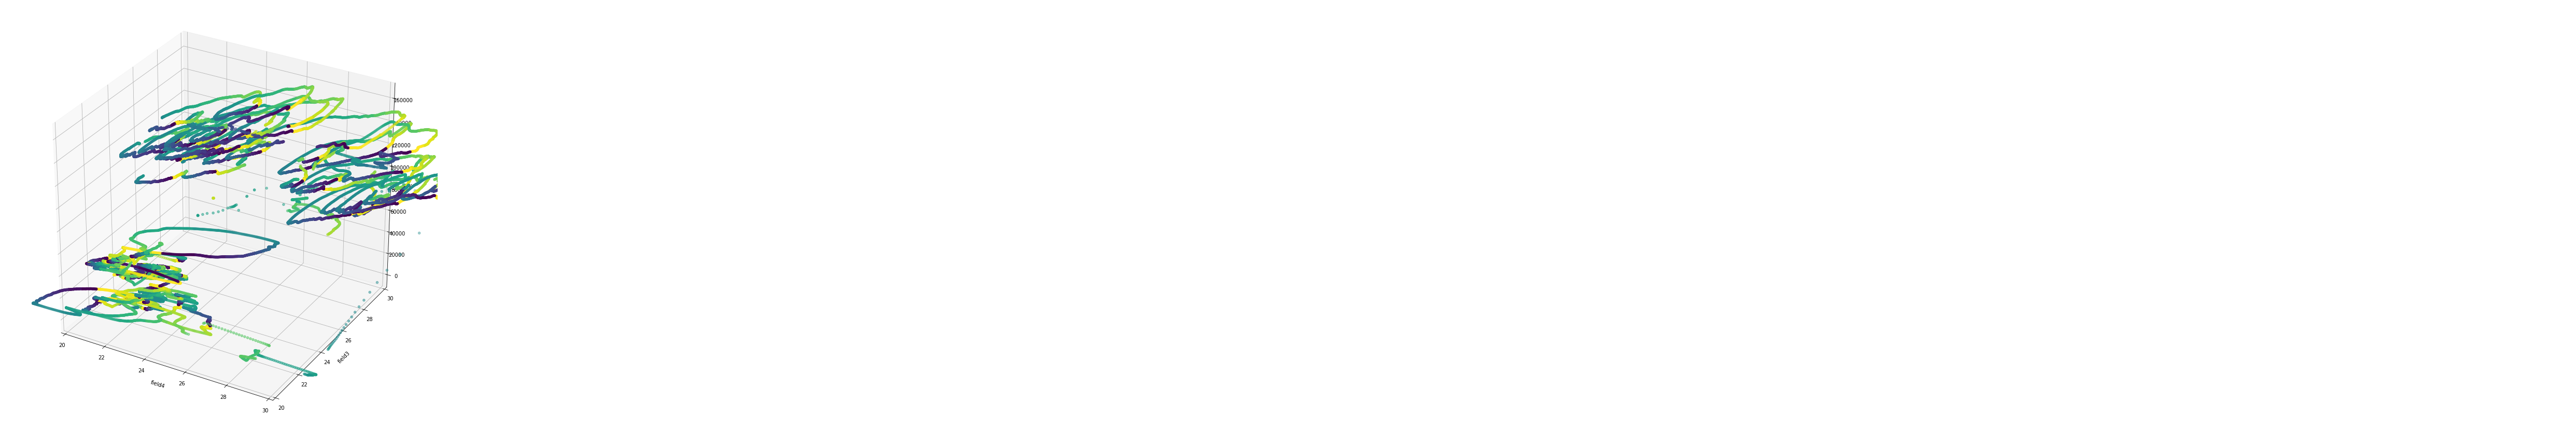

In [36]:
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import
import matplotlib.pyplot as plt
import numpy as np

df5 = df4[:300000]
df5['day'] = df5['day'] - df5['day'].min()
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter3D(df5.field4_mean, df5.field3_mean, df5.id, c=df5.hora)

ax.set_xlim(20,30)
ax.set_ylim(20,30)
ax.set_xlabel('field4')
ax.set_ylabel('field3')
ax.set_zlabel('day')
plt.show()


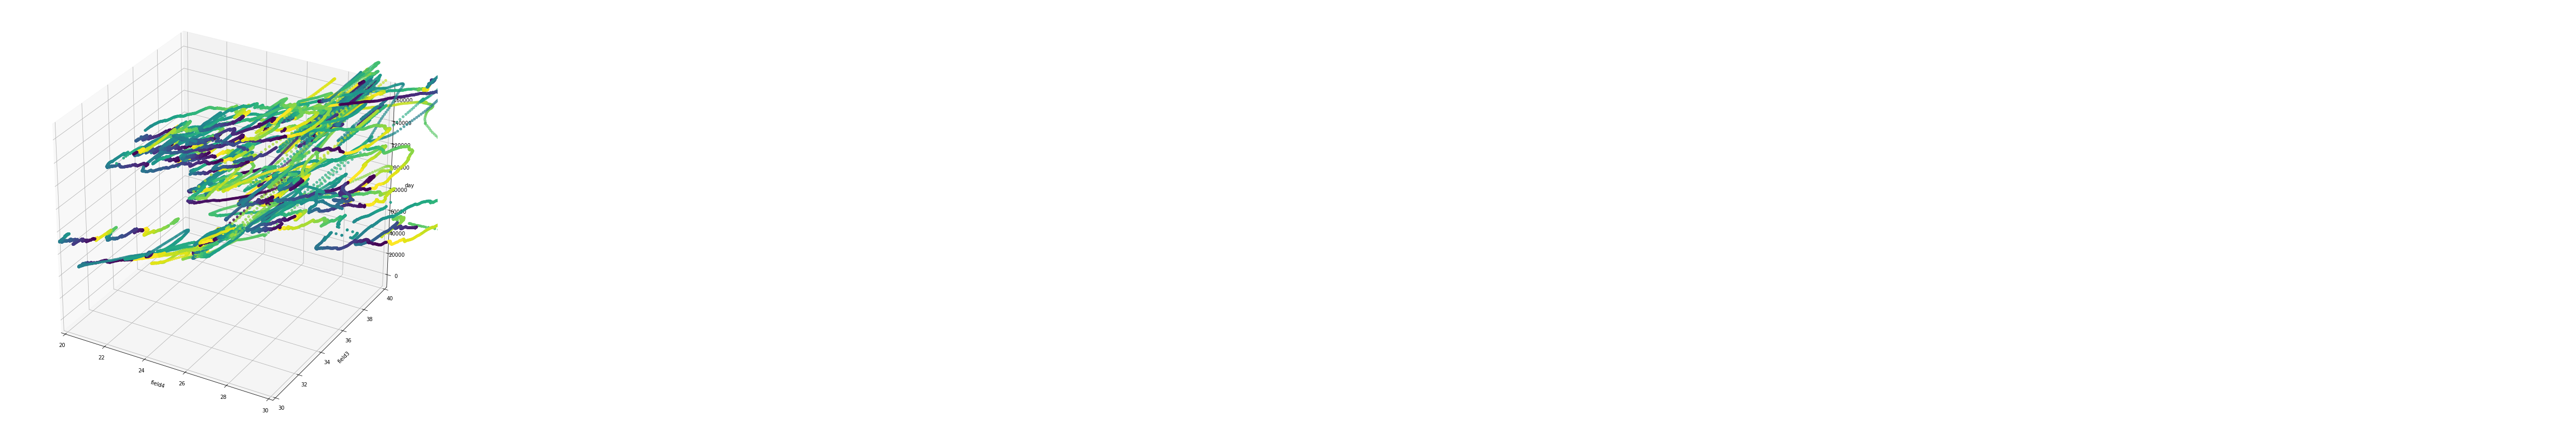

In [38]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter3D(df5.field4_mean, df5.field2_mean, df5.id, c=df5.hora)

ax.set_xlim(20,30)
ax.set_ylim(30,40)
ax.set_xlabel('field4')
ax.set_ylabel('field3')
ax.set_zlabel('day')
plt.show()
